In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import f1_score

# Load the dataset
crops = pd.read_csv('C:/Users/VARUN/OneDrive/Desktop/Projects/Data_Driven_Modeling_For_Agriculture/soil_measures.csv')
crops.head()

,N,P,K,ph,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice


In [2]:
crops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       2200 non-null   int64  
 1   P       2200 non-null   int64  
 2   K       2200 non-null   int64  
 3   ph      2200 non-null   float64
 4   crop    2200 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 86.1+ KB


In [3]:
crops.describe()

,N,P,K,ph
count,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,6.469480
std,36.917334,32.985883,50.647931,0.773938
min,0.000000,5.000000,5.000000,3.504752
25%,21.000000,28.000000,20.000000,5.971693
50%,37.000000,51.000000,32.000000,6.425045
75%,84.250000,68.000000,49.000000,6.923643
max,140.000000,145.000000,205.000000,9.935091


In [4]:
crops.isna().sum()
crops["crop"].value_counts()

crop
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

In [5]:
y= crops["crop"]
X_train,X_test,y_train,y_test=train_test_split(    
    crops[["N", "P", "K", "ph"]],
    y,
    test_size=0.2,
    random_state=42)

In [6]:
for f in ["N", "P", "K", "ph"]:
    model = LogisticRegression(max_iter=2000,multi_class='multinomial')
    model.fit(X_train[[f]],y_train)
    y_pred = model.predict(X_test[[f]])
    f_error = f1_score(y_test,y_pred,average='weighted')
    print(f"F1-score for {f}: {f_error}")

C:\Users\VARUN\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\VARUN\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\VARUN\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always

F1-score for N: 0.10280835482707096


C:\Users\VARUN\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\VARUN\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


F1-score for P: 0.12461947024902269
F1-score for K: 0.22910191796008686
F1-score for ph: 0.0458225366614312


C:\Users\VARUN\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\VARUN\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


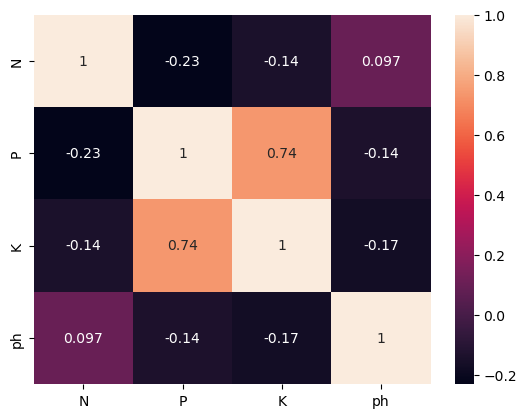

In [11]:
crop_loop = crops.select_dtypes(include=['int64','float64'])
sns.heatmap(crop_loop.corr(), annot=True)
plt.show()


In [12]:
crops_dummy=pd.get_dummies(crops['crop'],drop_first=True)
crops_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   banana       2200 non-null   bool 
 1   blackgram    2200 non-null   bool 
 2   chickpea     2200 non-null   bool 
 3   coconut      2200 non-null   bool 
 4   coffee       2200 non-null   bool 
 5   cotton       2200 non-null   bool 
 6   grapes       2200 non-null   bool 
 7   jute         2200 non-null   bool 
 8   kidneybeans  2200 non-null   bool 
 9   lentil       2200 non-null   bool 
 10  maize        2200 non-null   bool 
 11  mango        2200 non-null   bool 
 12  mothbeans    2200 non-null   bool 
 13  mungbean     2200 non-null   bool 
 14  muskmelon    2200 non-null   bool 
 15  orange       2200 non-null   bool 
 16  papaya       2200 non-null   bool 
 17  pigeonpeas   2200 non-null   bool 
 18  pomegranate  2200 non-null   bool 
 19  rice         2200 non-null   bool 
 20  watermel

In [13]:
crops_dummy = pd.concat([crops, crops_dummy], axis=1) 
crops_dummy = crops_dummy.drop("crop", axis=1)
crops_dummy

,N,P,K,ph,banana,blackgram,chickpea,coconut,coffee,cotton,...,mango,mothbeans,mungbean,muskmelon,orange,papaya,pigeonpeas,pomegranate,rice,watermelon
0,90,42,43,6.502985,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,85,58,41,7.038096,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,60,55,44,7.840207,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,74,35,40,6.980401,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,78,42,42,7.628473,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,6.780064,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2196,99,15,27,6.086922,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2197,118,33,30,6.362608,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2198,117,32,34,6.758793,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
final_features =['N','K','ph']
X_train, X_test, y_train, y_test = train_test_split(
    crops[final_features],
    crops["crop"],
    test_size=0.2,
    random_state=42
)
log_reg = LogisticRegression(max_iter=2000,multi_class='multinomial')
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)
f_error = f1_score(y_test,y_pred,average='weighted')
model_performance = f1_score(y_test, y_pred, average="weighted")
print(model_performance)

C:\Users\VARUN\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


0.5517578384579828


C:\Users\VARUN\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
